# Chapter 2 Hydrology: Drought Analysis

1. [Introduction](#1.-Introduction)
2. [Simulation](#2.-Simulation)
3. [Self-Assessment](#3.-Self-Assessment)
    3.1 [Self-Assessment_1](#3.1-Self-Assessment_1)
    3.2 [Self-Assessment_2](#3.2-Self-Assessment_2)
    3.3 [Self-Assessment_3](#3.3-Self-Assessment_3)

## 1.Introduction


```{figure} DroughtIndex.png
:alt: Descriptive alt text for accessibility
:width: 600px

**Figure 2.2 **: Drought Analysis.

```

### Drought Indices

Drought indices are quantitative tools that synthesize complex hydrometeorological data into a single value to assess the severity, duration, and spatial extent of droughts. These indices are essential for monitoring drought conditions, informing water resource management, and guiding policy decisions.

### 🌵 Common Drought Indices and Equations

### 🌵 Common Drought Indices and Equations

| **Index** | **Description** | **Key Equation / Basis** |
|-----------|------------------|---------------------------|
| **SPI (Standardized Precipitation Index)** | Measures precipitation anomalies over multiple timescales. | $SPI = \frac{X - \mu}{\sigma}$ where $X$ is precipitation, $\mu$ is mean, and $\sigma$ is standard deviation. |
| **PDSI (Palmer Drought Severity Index)** | Evaluates long-term drought using temperature and precipitation data. | Based on a water balance model incorporating evapotranspiration, soil moisture, and runoff. |
| **SPEI (Standardized Precipitation Evapotranspiration Index)** | Extends SPI by including temperature-driven evapotranspiration. | Climatic water balance: $Precipitation - PET$ |
| **CWSI (Crop Water Stress Index)** | Assesses plant water stress using canopy temperature. | $CWSI = \frac{T_c - T_{wet}}{T_{dry} - T_{wet}}$ |
| **SWSI (Surface Water Supply Index)** | Integrates snowpack, streamflow, and reservoir storage. | Weighted average of hydrologic components normalized to historical data. |

The SPEI index was introduced by {cite:p}`vicente2010spei`. The SPI index was introduced by {cite:p}`mckee1993spi`; The Palmer index was introduced by {cite:p}`palmer1965pdsi`; The CWSI method was proposed by {cite:p}`idso1981cwsi`, while SWSI was introduced by {cite:p}`shafer1982swsi`.A comprehensive overview of drought indices — including SPI, PDSI, and SWSI — and the evolving challenges of drought assessment under climate change is provided by Han and Singh {cite:t}`han2023drought`.

### Limitations of Drought Indices

- **Single-variable focus**: Many indices, like SPI, only account for precipitation.
- **Regional calibration issues**: Indices such as PDSI may underperform in areas with complex terrain or unusual soils.
- **Baseline dependency**: Results can be sensitive to the reference period used for standardization.
- **Time lag**: Some indices may not respond immediately to drought onset or cessation.
- **Data demands**: Require high-quality, long-term climate data for accuracy.


### Potential Uses and Applications

- **Early warning systems**: Trigger alerts for proactive drought management.
- **Agriculture**: Support irrigation planning and crop decisions.
- **Water resource management**: Guide reservoir operations and allocation.
- **Climate research**: Evaluate long-term drought trends and projections.
- **Policy making and insurance**: Define thresholds for drought declarations and impact-based payouts.

###  Influence of Future Climate Projections on Drought Indices

As the climate continues to evolve, drought indices must adapt to changing temperature and precipitation patterns. Future projections alter how we interpret drought severity and frequency, highlighting the need for more responsive and climate-aware tools.


### Key Influences on Drought Indices

1. **Changing Baselines**  
   Most indices use historical averages to define “normal” conditions. As precipitation and temperature patterns shift, these baselines become outdated, potentially masking the true severity of future droughts.

2. **Rising Evapotranspiration**  
   Higher temperatures increase evapotranspiration, reducing soil moisture even without a decrease in precipitation. Indices that ignore temperature (e.g., SPI) may underestimate future drought risk.

3. **Precipitation Variability**  
   Future climates are expected to experience more erratic rainfall, characterized by dry spells followed by intense storms. This variability challenges assumptions of consistency built into traditional drought models.

4. **Regional Disparities**  
   Different regions will experience varying types of drought. For instance, chronic drought in the Southwest versus flash droughts in the Midwest. Indices need regional calibration to remain meaningful.

5. **Scenario Sensitivity**  
   Drought forecasts vary under different greenhouse gas pathways (e.g., SSP1-2.6 vs. SSP5-8.5), introducing uncertainty into long-term planning.


### Index-Specific Impacts

| **Drought Index** | **Projected Climate Impacts** |

| **SPI**           | May understate drought under warming due to lack of temperature sensitivity. |
| **SPEI**          | Better captures future drought risk by incorporating PET; more climate-resilient. |
| **PDSI**          | Can overestimate drought in arid areas; sensitive to model assumptions. |
| **CWSI**          | Limited by the availability of high-resolution remote sensing for future projections. |
| **SWSI**          | Highly variable due to uncertain snowpack and hydrologic inputs under climate change. |


### Strategic Applications

- **Adaptive Baselines**: Use rolling averages or model-based baselines to reflect evolving climatic norms.
- **Forecast Integration**: Combine drought indices with seasonal forecasts or climate model outputs.
- **Decision-Making Support**: Inform water allocation, land-use policy, and emergency preparedness.
- **Enhanced Monitoring**: Integrate with remote sensing and AI-based tools for more timely detection.

### Foundational Literature

{cite}`vicente2010spei`, {cite}`mckee1993spi`,{cite}`palmer1965pdsi`, {cite}`idso1981cwsi`, {cite}`shafer1982swsi`, represent key literature on the development of drought indices. {cite:t}`han2023drought` provides a comprehensive synthesis of these indices and their evolving relevance under climate change. These sources provide a fundamental understanding of drought assessment frameworks.




## 2. Simulation

C:\Users\satis\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


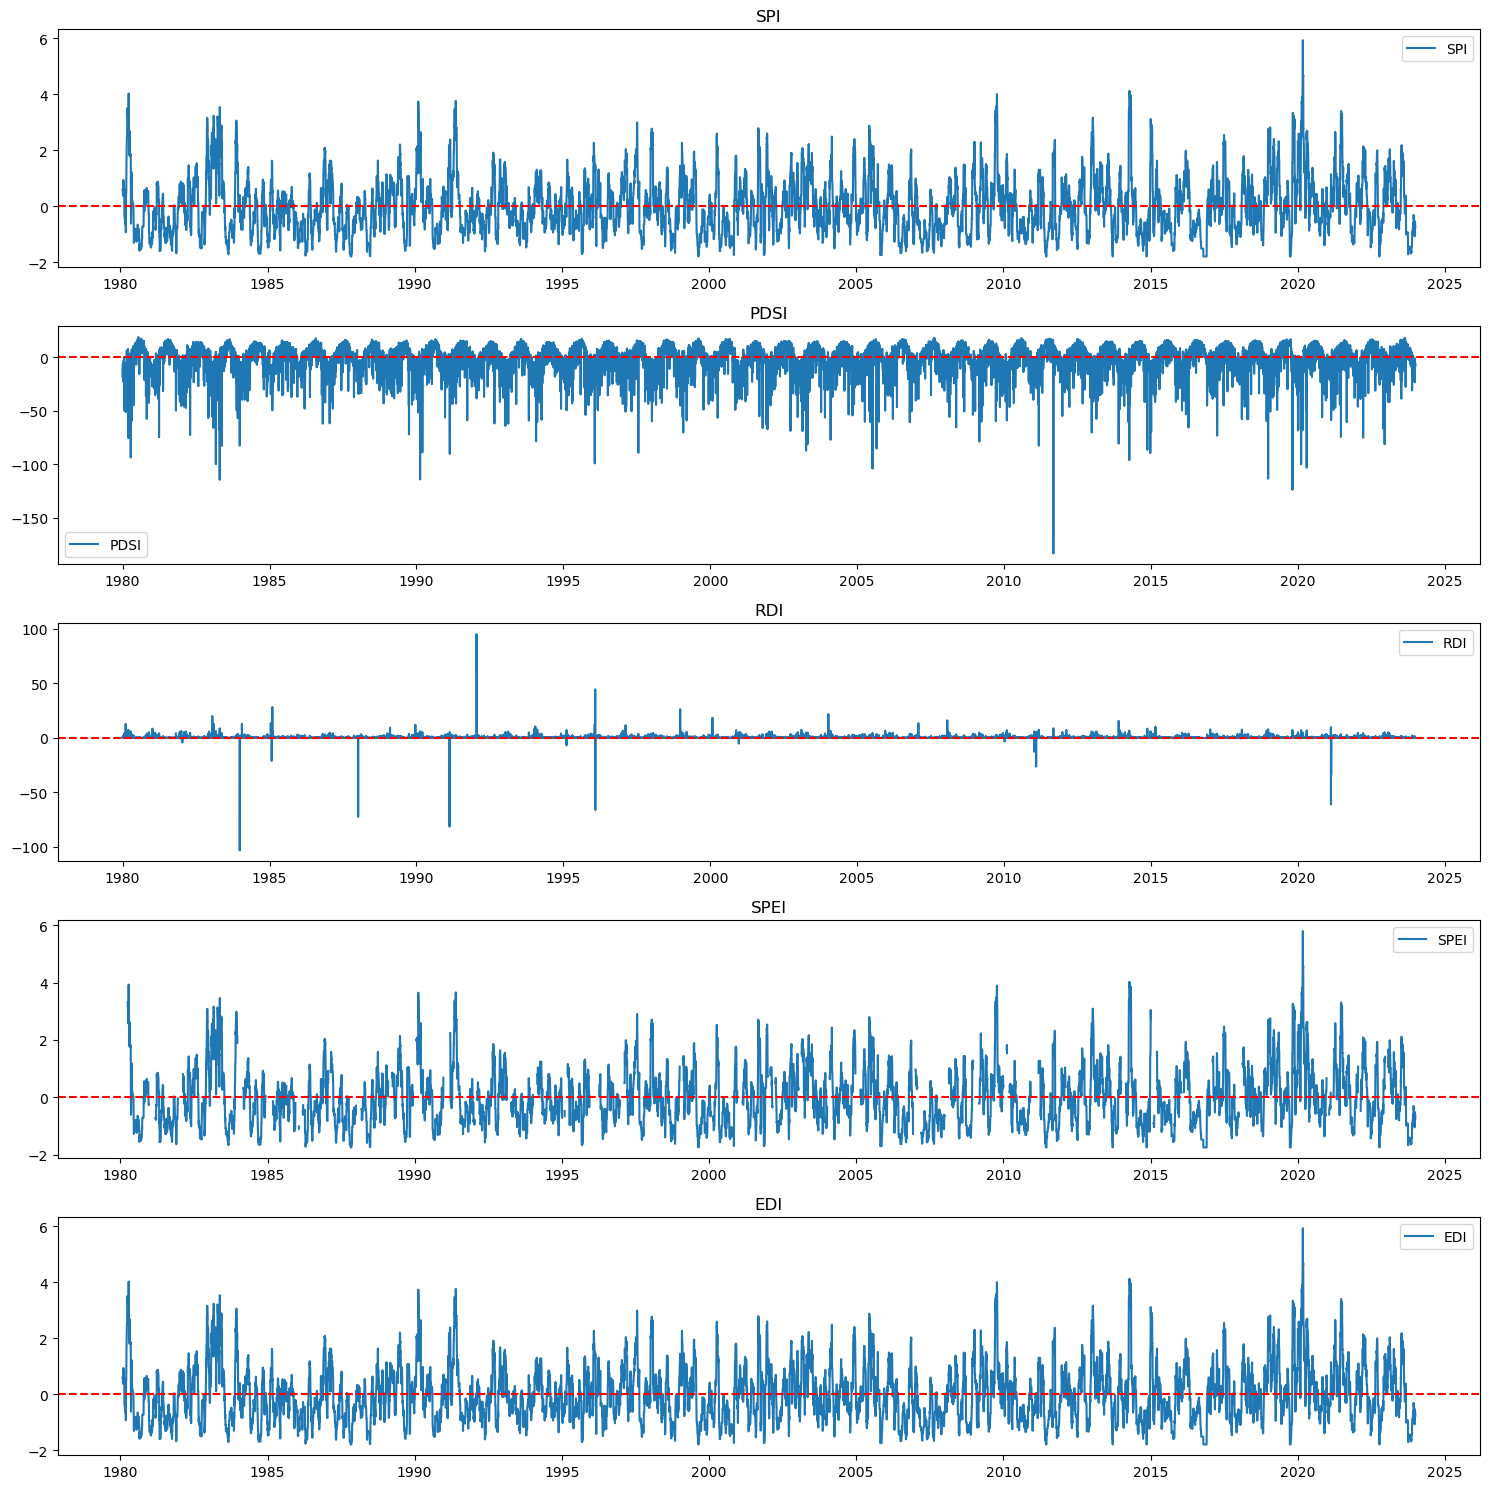

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from daymetpy import get_daymet_singlepixel
import requests
import io
#pip install pandas matplotlib requests daymetpy
# pip install pandas matplotlib requests daymetpy
# Coordinates and year
lat = 30.25
lon = -90.07
year = 2020
# Request URL
#url = f"https://daymet.ornl.gov/single-pixel/api/data?lat={lat}&lon={lon}&year={year}&format=csv"
url=f"https://daymet.ornl.gov/single-pixel/api/data?lat=33.1&lon=-88&vars=CommaSeparatedVariables&years=CommaSeparated2020"

# Make authenticated request
with requests.Session() as s:
    #s.auth = (USERNAME, PASSWORD)
    r = s.get(url)
    if r.status_code != 200:
        raise Exception(f"Failed: {r.status_code} – {r.reason}")
    
    df = pd.read_csv(io.StringIO(r.text), skiprows=6)
    df['temperature'] = (df['tmin (deg c)'] + df['tmax (deg c)']) / 2
    df['date'] = pd.to_datetime(df['year'].astype(str) + df['yday'].astype(str), format='%Y%j')
    df = df[['date', 'prcp (mm/day)', 'temperature']].rename(columns={'prcp (mm/day)': 'precipitation'})
    
# Plot example
# Create DataFrame
df = pd.DataFrame(df)

# Calculate Standardized Precipitation Index (SPI)
def calculate_spi(precipitation, scale=30):
    rolling_precip = precipitation.rolling(window=scale).sum()
    spi = (rolling_precip - rolling_precip.mean()) / rolling_precip.std()
    return spi

# Calculate Palmer Drought Severity Index (PDSI)
def calculate_pdsi(temperature, precipitation):
    # Simplified PDSI calculation
    pdsi = (temperature - temperature.mean()) - (precipitation - precipitation.mean())
    return pdsi

# Calculate Reconnaissance Drought Index (RDI)
def calculate_rdi(temperature, precipitation):
    rdi = precipitation / (temperature + 1)
    return rdi

# Calculate Standardized Precipitation Evapotranspiration Index (SPEI)
def calculate_spei(precipitation, temperature, scale=30):
    evapotranspiration = 0.0023 * (temperature + 17.8) * np.sqrt(temperature) * (1 - np.exp(-0.02 * precipitation))
    water_balance = precipitation - evapotranspiration
    rolling_balance = water_balance.rolling(window=scale).sum()
    spei = (rolling_balance - rolling_balance.mean()) / rolling_balance.std()
    return spei

# Calculate Effective Drought Index (EDI)
def calculate_edi(precipitation, scale=30):
    rolling_precip = precipitation.rolling(window=scale).sum()
    mean_precip = rolling_precip.mean()
    std_precip = rolling_precip.std()
    edi = (rolling_precip - mean_precip) / std_precip
    return edi

# Add drought indices to DataFrame
df['spi'] = calculate_spi(df['precipitation'])
df['pdsi'] = calculate_pdsi(df['temperature'], df['precipitation'])
df['rdi'] = calculate_rdi(df['temperature'], df['precipitation'])
df['spei'] = calculate_spei(df['precipitation'], df['temperature'])
df['edi'] = calculate_edi(df['precipitation'])

# Plot drought indices
plt.figure(figsize=(15, 15))
indices = ['spi', 'pdsi', 'rdi', 'spei', 'edi']
titles = ['SPI', 'PDSI', 'RDI', 'SPEI', 'EDI']

for i, idx in enumerate(indices, 1):
    plt.subplot(5, 1, i)
    plt.plot(df['date'], df[idx], label=titles[i-1])
    plt.axhline(0, color='red', linestyle='--')
    plt.title(titles[i-1])
    plt.legend()

plt.tight_layout()
plt.show()

# # Plot drought indices
# plt.figure(figsize=(15, 15))

# plt.subplot(5, 1, 1)
# plt.plot(df['date'], df['spi'], label='SPI')
# plt.axhline(0, color='red', linestyle='--')
# plt.title('Standardized Precipitation Index (SPI)')
# plt.legend()

# plt.subplot(5, 1, 2)
# plt.plot(df['date'], df['pdsi'], label='PDSI')
# plt.axhline(0, color='red', linestyle='--')
# plt.title('Palmer Drought Severity Index (PDSI)')
# plt.legend()

# plt.subplot(5, 1, 3)
# plt.plot(df['date'], df['rdi'], label='RDI')
# plt.axhline(0, color='red', linestyle='--')
# plt.title('Reconnaissance Drought Index (RDI)')
# plt.legend()

# plt.subplot(5, 1, 4)
# plt.plot(df['date'], df['spei'], label='SPEI')
# plt.axhline(0, color='red', linestyle='--')
# plt.title('Standardized Precipitation Evapotranspiration Index (SPEI)')
# plt.legend()

# plt.subplot(5, 1, 5)
# plt.plot(df['date'], df['edi'], label='EDI')
# plt.axhline(0, color='red', linestyle='--')
# plt.title('Effective Drought Index (EDI)')
# plt.legend()

# plt.tight_layout()
# plt.show()


## 3. Self-Assessment

### 3.1 Self-Assessment_1

### Exploring Drought Indices Using Python

By the end of this module, students will be able to:

- Understand the purpose and mechanics of common drought indices.
- Analyze climate data using Python to calculate indices such as SPI, SPEI, PDSI, RDI, and EDI.
- Visualize and compare how different drought indices behave over time.
- Reflect on the limitations and appropriate applications of each index in real-world scenarios.


### Conceptual Questions (Pre-coding Discussion)

1. What is a drought index, and why might we need more than one to capture drought behavior?
2. In what ways does temperature influence how we assess drought severity?
3. What are the benefits and limitations of using randomized climate data versus observed records?
4. How does using a rolling window (e.g., 30-day mean) influence the interpretation of drought onset and duration?

### In-Class Coding Activity

Students will:

- Implement code to compute five drought indices using synthetic precipitation and temperature data.
- Modify the rolling window scale (e.g., from 30 days to 90 days) and observe the differences.
- Simulate a synthetic drought period (e.g., reduce precipitation between June and August) and examine each index’s response.
- Visualize all indices and interpret which are more responsive or stable over time.


### Reflective Prompts (Post-coding)

- Which index was most responsive to short-term changes in precipitation or temperature?
- Which index provided a more stable long-term view of drought progression?
- If you were tasked with designing a drought monitoring system for your region, which index would you prioritize, and why?
- What additional environmental variables (e.g., soil moisture, wind speed) would enhance your drought assessment?


### Extension Ideas

- Load real-world climate data from GRIDMET or ERA5.
- Develop an interactive dashboard using `ipywidgets` or `Plotly Dash`.
- Perform ensemble simulations using synthetic climate scenarios to evaluate index robustness.
- Compare observed droughts (e.g., 2011 Texas drought) to modeled indices.


### 3.2 Self-Assessment_2

#### Multi-Time Scale Drought Index Visualization and Analysis

This interactive tool provides a dynamic visualization and statistical summary of drought behavior across multiple time scales using widely recognized drought indices—**SPI**, **SPEI**, and **EDI**. The goal is to analyze the **temporal dynamics** of drought conditions at varying aggregation periods and quantify both the **severity** and **duration** of dry spells.

---
#### Features
- **Interactive dropdown menu** to select a drought index (`SPI`, `SPEI`, `EDI`)
- **Heatmap** displaying index values across different time scales (30, 60, 90, 120 days)
- **Annual x-axis ticks** for clean temporal interpretation
- **Summary table** highlighting:
  - Mean drought severity (average index value during drought periods)
  - Mean drought duration (average length of consecutive drought days)
---

### Methodology

###  Time Scales Analyzed
- **30 days**: captures short-term droughts and rapid shifts in weather
- **60 days**: balances short- and medium-term anomalies
- **90 days**: reveals seasonal-scale dryness
- **120 days**: identifies persistent or long-term droughts

### Drought Indicators
- **SPI (Standardized Precipitation Index)**: based on precipitation anomalies
- **SPEI (Standardized Precipitation Evapotranspiration Index)**: considers both precipitation and temperature-induced evapotranspiration
- **EDI (Effective Drought Index)**: captures effective rainfall anomalies over time

###  Summary Metrics

| Metric              | Definition                                                                 |
|---------------------|------------------------------------------------------------------------------|
| **Mean Severity**   | Average index value **below 0**, indicating how intense typical drought periods are |
| **Mean Duration**   | Average length (in days) of **consecutive drought periods** (i.e., runs of index < 0)  |

The table updates automatically based on the selected drought index and time scale combination, providing insight into the temporal characteristics of drought persistence and depth.

---
###  Visualization Output

- Heatmap:
  - **Rows** = time scales (days)
  - **Columns** = dates
  - **Colors**:
    - 🔵 Blue = wet periods
    - ⚪ Neutral = normal conditions
    - 🔴 Red = drought periods
- Summary Table:
  - Tabular report of **mean drought severity and duration** for each selected scale.

---

### How to Use

1. Run the code in a Jupyter Notebook with pandas, matplotlib, seaborn, ipywidgets.
2. Ensure that the functions `calculate_spi`, `calculate_spei`, and `calculate_edi` are defined.
3. Load a `df` DataFrame with columns:
   - `date` (datetime)
   - `precipitation` (mm)
   - `temperature` (°C)
4. Choose a drought index from the dropdown to explore multi-scale behavior.
5. Interpret both the **visual trends** and the **quantitative summary** for informed drought diagnostics.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define time scales to evaluate
scales = [30, 60, 90, 120]

# Define drought index functions beforehand
index_functions = {
    'SPI': calculate_spi,
    'SPEI': calculate_spei,
    'EDI': calculate_edi
}

# Create dropdown widget
index_selector = widgets.Dropdown(
    options=list(index_functions.keys()),
    value='SPI',
    description='Drought Index:'
)

# Output area
output = widgets.Output()

def compute_drought_duration(series):
    """Returns mean duration of droughts (runs of consecutive values < 0)"""
    drought_lengths = []
    count = 0
    for val in series:
        if pd.isna(val):
            if count > 0:
                drought_lengths.append(count)
                count = 0
            continue
        if val < 0:
            count += 1
        elif count > 0:
            drought_lengths.append(count)
            count = 0
    if count > 0:
        drought_lengths.append(count)
    return np.mean(drought_lengths) if drought_lengths else 0

def plot_index_heatmap(index_name):
    with output:
        clear_output(wait=True)

        heat_df = pd.DataFrame({'date': df['date']})
        summaries = []

        for scale in scales:
            # Compute drought index
            if index_name == 'SPEI':
                values = calculate_spei(df['precipitation'], df['temperature'], scale)
            else:
                values = index_functions[index_name](df['precipitation'], scale)

            heat_df[f'{index_name}_{scale}'] = values

            # Mean severity (only values < 0) and mean duration
            mean_severity = values[values < 0].mean()
            mean_duration = compute_drought_duration(values)
            summaries.append({'Time Scale (days)': scale,
                              'Mean Severity': round(mean_severity, 2),
                              'Mean Duration (days)': round(mean_duration, 1)})

        # Reshape for heatmap
        melted = pd.melt(heat_df, id_vars='date', var_name='scale', value_name='Value')
        melted['scale'] = melted['scale'].str.extract(r'(\d+)').astype(int)
        heatmap_df = melted.pivot_table(index='scale', columns='date', values='Value')
        heatmap_df.columns = pd.to_datetime(heatmap_df.columns)

        # Set tick positions
        tick_spacing = 365
        tick_positions = heatmap_df.columns[::tick_spacing]
        tick_labels = [d.strftime('%Y') for d in tick_positions]

        # Plot heatmap
        fig, ax = plt.subplots(figsize=(16, 5))
        sns.heatmap(heatmap_df, cmap='RdBu_r', center=0,
                    cbar_kws={'label': f'{index_name} Value'}, ax=ax)

        ax.set_title(f'{index_name} Heatmap Across Time Scales')
        ax.set_ylabel('Time Scale (Days)')
        ax.set_xlabel('Year')
        ax.set_xticks(np.arange(0, len(heatmap_df.columns), tick_spacing))
        ax.set_xticklabels(tick_labels, rotation=0, ha='center')
        plt.tight_layout()
        plt.show()

        # Print summary table
        summary_df = pd.DataFrame(summaries)
        print(f"\n📊 {index_name} Summary by Time Scale:")
        display(summary_df)

# Display interactive widget
widgets.interact(plot_index_heatmap, index_name=index_selector)
display(output)

interactive(children=(Dropdown(description='Drought Index:', options=('SPI', 'SPEI', 'EDI'), value='SPI'), Out…

Output()

### 3.3 Self-Assessment_3

### Conceptual and Reflective Questions on Multi-Time Scale Drought Indices

This section complements the interactive visualization and analysis of drought indices (SPI, SPEI, EDI) across multiple time scales. Use these questions to deepen understanding, guide discussion, or frame assessments in an educational or analytical setting.

###  Conceptual Questions

1. **Why is it important to analyze drought indices across multiple time scales instead of using a fixed window?**
2. **How does increasing the rolling window (e.g., from 30 to 120 days) affect the responsiveness of drought detection?**
3. **In what scenarios might short-term drought indices (e.g., 30-day SPI) be misleading or insufficient?**
4. **What are the key differences between SPI, SPEI, and EDI in how they represent drought processes?**
5. **How might incorporating temperature (e.g., in SPEI) change the interpretation of drought under climate change?**
6. **What assumptions underlie the use of rolling averages in drought computation, and how might these affect accuracy?**
7. **Why is the value zero commonly used as the threshold between drought and non-drought conditions in indices?**



### Reflective Questions

1. **Which drought index (SPI, SPEI, or EDI) provided the most intuitive interpretation of drought in your region, and why?**
2. **How did mean severity and mean duration shift as the time scale increased? Were the results consistent with expectations?**
3. **Were there drought events detected at short time scales but not visible at longer ones? What does this suggest about index sensitivity?**
4. **How might your drought response strategy differ if based on 30-day vs. 120-day index values?**
5. **Which time scale seemed to best align with observed seasonal dry periods? Explain how this influenced your interpretation.**
6. **If you were advising a policymaker, which index and scale would you recommend for early warning versus long-term planning?**
7. **What might be the consequences of overestimating or underestimating drought intensity when using only a single time scale?**

